In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras import optimizers
import keras.backend as K
from keras.applications import VGG16
from keras.preprocessing import image
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2

Using TensorFlow backend.


In [ ]:
original_dataset_dir = '\\Users\\Hazem\\Desktop\\Dataset\\train'
base_dir = '/Users/Hazem/Desktop/Dataset/small_cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))

In [2]:
#Pretrained Network
model = VGG16(weights = 'imagenet', include_top=False, input_shape=(150,150,3))
#conv_base.summary()

W0802 12:22:03.652215  2604 deprecation_wrapper.py:119] From C:\Users\Hazem\Anaconda3\envs\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 12:22:03.671202  2604 deprecation_wrapper.py:119] From C:\Users\Hazem\Anaconda3\envs\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 12:22:03.675200  2604 deprecation_wrapper.py:119] From C:\Users\Hazem\Anaconda3\envs\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 12:22:03.711179  2604 deprecation_wrapper.py:119] From C:\Users\Hazem\Anaconda3\envs\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 12:22:04.037830  2604 deprecation

In [3]:
#Function to represent the image
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [4]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    print(layer_output.shape)
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        img = input_img_data[0]
    return deprocess_image(img)

(?, 37, 37, 256)


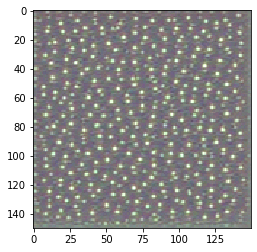

In [5]:
plt.imshow(generate_pattern('block3_conv1', 0))